# 파이썬 머신러닝 완벽가이드 리뷰

In [3]:
# sklearn 다운로드
!pip install scikit-learn

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
# sklearn 버전확인
import sklearn
print(sklearn.__version__)

0.24.2


# 머신러닝 기초

## 붓꽃 품종 예측하기

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 feature만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 데이터 세트의 label값을 numpy로 가지고 있습니다.
iris_label = iris.target
print(f'iris target값 : {iris_label}')
print(f'iris target명 : {iris.target_names}')

# 붓꽃 데이터 세트를 자세히 보기 위해  DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data= iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


setosa = 0, versicolor = 1, virginica = 2

In [7]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [9]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

# 
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


**프로세스 정리**
1. 데이터 세트 분리 
2. 모델 학습
3. 예측 수행
4. 평가

## 사이킷런의 기반 프레임워크 익히기

**Estimator 이해 및 fit(), predict() 메서드**

- 사이킷런은 ML모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해서 predict() 메서드를 제공한다. 
- 사이킷런에는 많은 Classifier와 Regressor 를 제공하고 이 둘을 합쳐서 Estimator 클래스 라고 부른다.

**Model Selection 모듈 소개**

- model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나, 교차검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공한다. 

**train_test_split()**

- 학습데이터로만 사용을 하면 예측을 100%한다. 왜냐하면 이미 학습되어있었기 때문이다.

< 파라미터 설명 >
- test_size : 테스트 데이터의 크기를 얼마로 할것인가
- train_size : 학습데이터를 얼마로 할것인가
- shuffle : 데이터를 분리하기 전에 미리 섞을것인가, 디폴트는 True이다.(데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는데 사용된다.)
- random_state : 랜덤시드값이랑 같은 의미이다.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 모델 객체 생성
dt_clf = DecisionTreeClassifier()

# 데이터셋 로드
iris_data = load_iris()

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size =0.3, random_state = 121)

# 모델 객체 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f'예측 정확도 : {accuracy_score(y_test, pred):.4f}')

예측 정확도 : 0.9556


- 높은 정확도가 나왔지만 test데이터가 45개 정도 밖에 되지않기 때문에 적절하지는 않다.

**교차검증**

- 위에서 진행한 방법은 제대로된 예측을 하기위해 test데이터를 분리했었습니다. 하지만, 위의 방법 역시 과적합(Overfittnig)의 위험이 있습니다.
- 과적합이란 모델이 학습 데이터에만 과도하게 최적화가 된것을 말합니다. 그렇기 때문에 다른 데이터에는 성능이 매우 떨어지게됩니다.
- 또한, 하나의 훈련과 테스트 데이터를 통해 모델을 만들게 되면 해당하는 테스트 데이터에만 적합한 모델이 완성되어 새로운 테스트 데이터를 예측하지 못하게 됩니다. 
- 이러한 문제를 개선하기 위해 교차검증을 실시 합니다.
- 교차검증은 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행한다. 그리고 각 세트에서 수행한 평과 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.

< 교차검증 방법1 >

Hold-out : 1차 평가를 한 뒤 최종적으로 테스트 데이터 세트에서 적용하는 프로세스로 데이터세트를 세분화 하여 학습, 검증, 테스트 데이터세트로 나눌 수 있다.

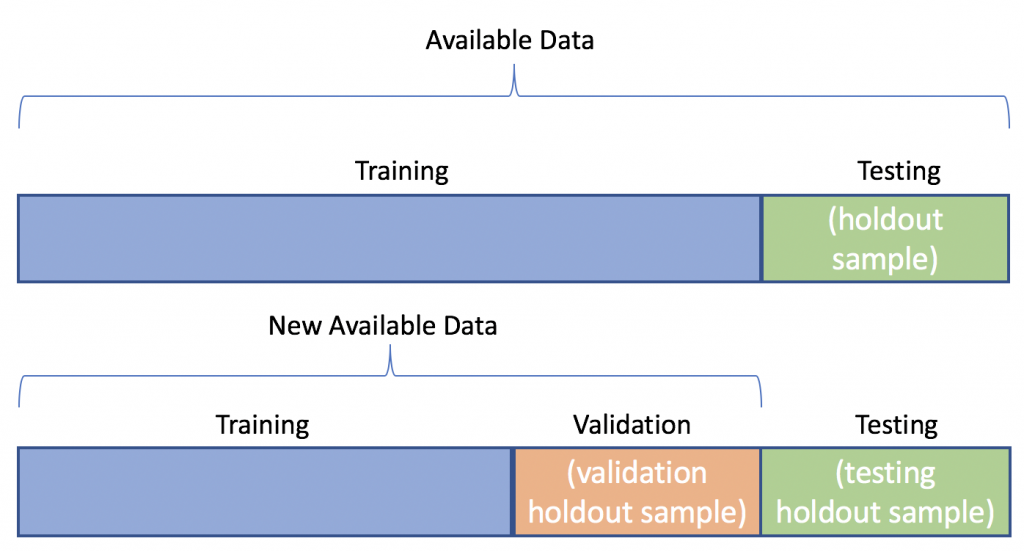

< 교차검증 방법2 >

k-fold 교차검증 : 가장 보편적으로 사용되는 교차 검증 기법입니다. 먼저 k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.


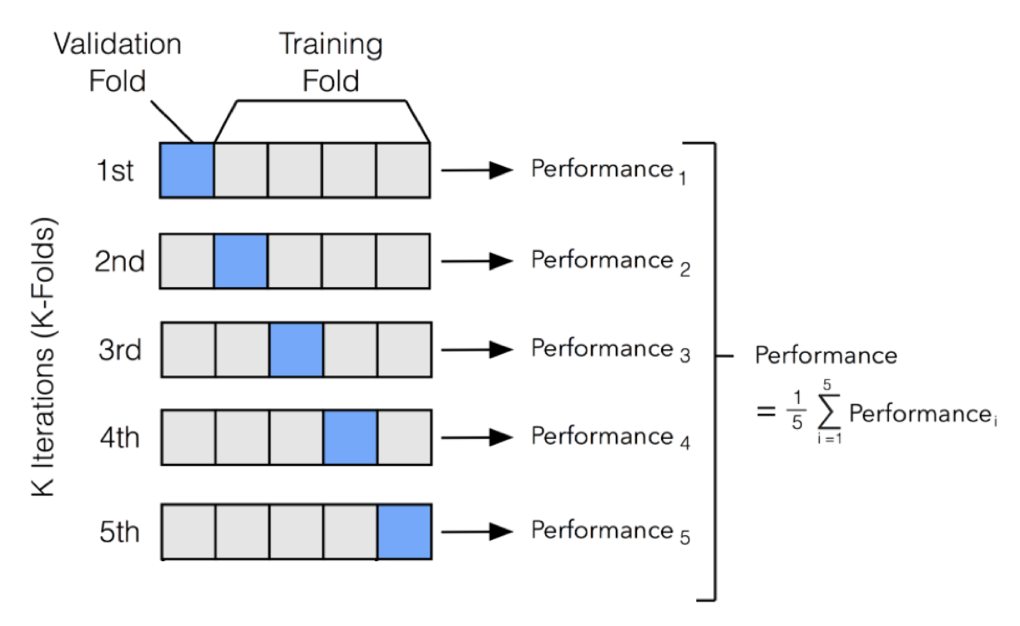

- 위의 그림은 5폴드 교차검증으로서(k가 5개) 5개의 폴드된 데이터 세트를 각각 학습과 검증을 변경해가면서 총 5번을 수행한뒤 평균을 구해서 k폴드 평가 결과로 반영하는 방법이다. 
- 사이킷런에서 k폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold클래스를 제공한다.
- 붓꽃데이터를 다시한번 불러와 5개의 폴드세트로 분리하는 KFold를 생성해 보겠습니다.

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits = 5)
cv_accuracy = []
print(f'붓꽃 데이터 세트 크기 : {features.shape[0]}')

붓꽃 데이터 세트 크기 : 150


예제1)

In [14]:
n_iter = 0

# KFold 객체의 split()을 호출하면 폴드 별 학습용
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train , y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0}교차 검증 정확도 : {1}, 학습데이터 크기: {2}, 검증 데이터 크기{3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 :{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도를 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1교차 검증 정확도 : 1.0, 학습데이터 크기: 120, 검증 데이터 크기30
#1 검증 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2교차 검증 정확도 : 0.9667, 학습데이터 크기: 120, 검증 데이터 크기30
#2 검증 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3교차 검증 정확도 : 0.8667, 학습데이터 크기: 120, 검증 데이터 크기30
#3 검증 세트 인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4교차 검증 정확도 : 0.9333, 학습데이터 크기: 120, 검증 데이터 크기30
#4 검증 세트 인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5교차 검증 정확도 : 0.7333, 학습데이터 크기: 120, 검증 데이터 크기30
#5 검증 세트 인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


예제2)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle= True, random_state = 42)

# cross_val_score(모델, X값, y값, cv개수)
scores = cross_val_score(dt_clf, iris.data, iris.target, scoring = 'accuracy', cv = kfold)
print(scores)
print(scores.mean())

[1.         0.96666667 0.93333333 0.93333333 0.93333333]
0.9533333333333335


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

# cross_val_score(모델, X값, y값, cv개수)
scores = cross_val_score(dt_clf, iris.data, iris.target,scoring = 'accuracy', cv = kfold)
print(scores)
print(scores.mean())



[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.9600000000000002


회귀에서는 주로 K-Fold를 분류에서는 StratifiedKFold를 사용한다. 
StratifiedKFold의 경우 라벨값이 불균형한 분포를 가지고 있을때 분포 비율에 따라서 맞춰준다.